# Financial Forecasting

This code comes from this website: https://medium.com/@lfoster49203/financial-forecasting-with-machine-learning-using-python-numpy-pandas-matplotlib-and-3a636989999b

Model used: Recurrent Neural Network (RNN) with LSTM cells

### Step 1. Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

### Load the data from your API KEY

In [12]:
import requests

api_key = 'JH15DXXQ40BJ3QCD'
symbol = 'ARM'
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=NVDA&outputsize=full&apikey=JH15DXXQ40BJ3QCD'
response = requests.get(url)
data = response.json()
if "Time Series (Daily)" in data:
    df = pd.DataFrame(data['Time Series (Daily)']).transpose()
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
else:
    print("Error: Time Series")
    print(data)

### Preprocess the data

In [14]:
# Extract the closing prices
y = df['4. close'].values.astype(float)

# Normalize the closing prices
scaler = MinMaxScaler(feature_range=(0, 1))
y = scaler.fit_transform(y.reshape(-1, 1))
# Create the feature matrix
X = []
for i in range(60, len(df)):
    X.append(y[i-60:i, 0])
X = np.array(X)
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y[60:], test_size=0.2, shuffle=False)

### Define the Model

In [15]:
# Define the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\miba_\Documents\IA-FullStack\MachineLearning\Ejercicios\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Train the model

In [16]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 8.7124e-04 - val_loss: 0.0050
Epoch 2/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 3.5750e-05 - val_loss: 0.0041
Epoch 3/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 3.1965e-05 - val_loss: 0.0037
Epoch 4/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.7907e-05 - val_loss: 0.0033
Epoch 5/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8644e-05 - val_loss: 0.0033
Epoch 6/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.7926e-05 - val_loss: 0.0029
Epoch 7/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.2448e-05 - val_loss: 0.0025
Epoch 8/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 2.3237e-05 - val_loss: 0.0023
Epoch 9/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 1.9584e-05 - val_loss: 0.0022
Epoch 10/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.6945e-05 - val_loss: 0.0021
Epoch 11/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.6626e-05 - val

### Evaluate the model

In [6]:
# Evaluate the model on the validation set
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print('Root Mean Squared Error:', rmse)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Root Mean Squared Error: 0.030548460376100657


### Visualize the results

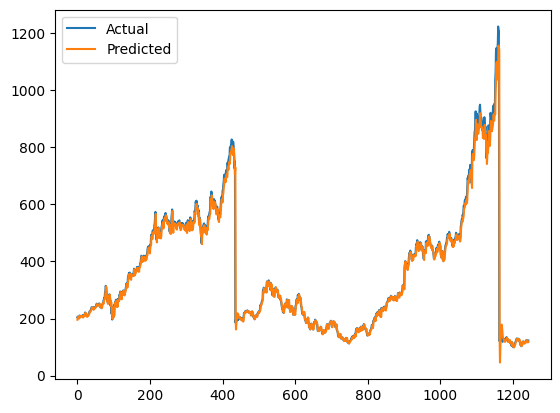

In [7]:
# Visualize the results
y_pred = scaler.inverse_transform(y_pred)
y_val = scaler.inverse_transform(y_val)
plt.plot(y_val, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

### Make predictions

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

In [11]:
# Make predictions
last_60_days = y[-60:]
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("Shape X_test:", X_test.shape)
print("Forma de X_train:", X_train.shape)

y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
print('Predicted price:', y_pred[0][0])

Shape X_test: (1, 60)
Forma de X_train: (4968, 60, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted price: -0.7058126
